<a href="https://colab.research.google.com/github/yemi8/mall-customer/blob/main/BITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Head of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Summary stat

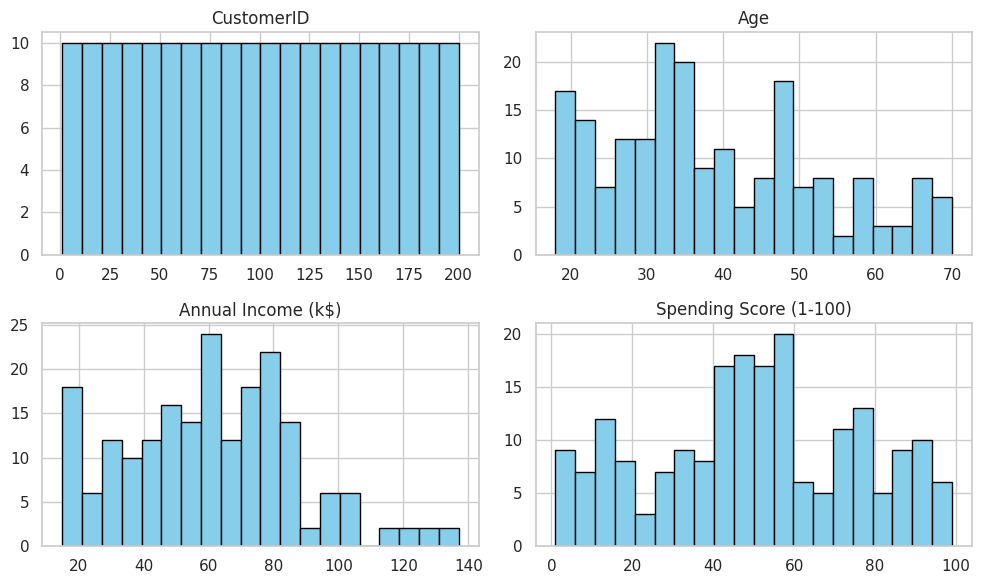


Displayed histograms showing distribution of numerical features.


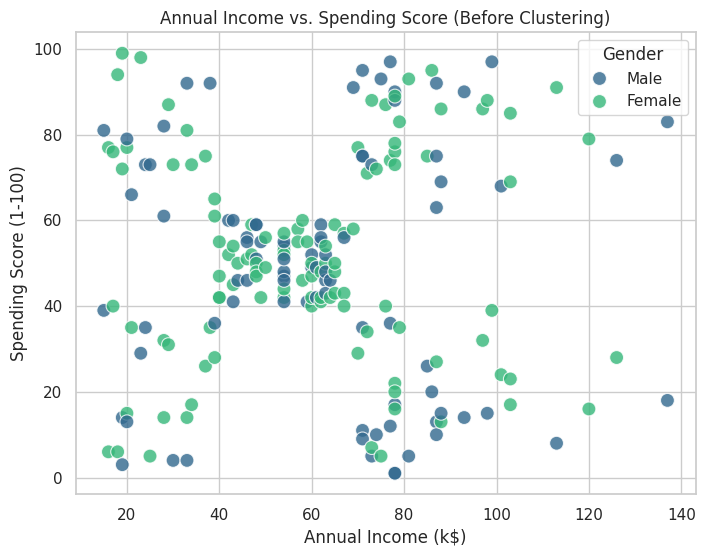

Displayed Annual Income vs. Spending Score (Before Clustering) scatter plot.


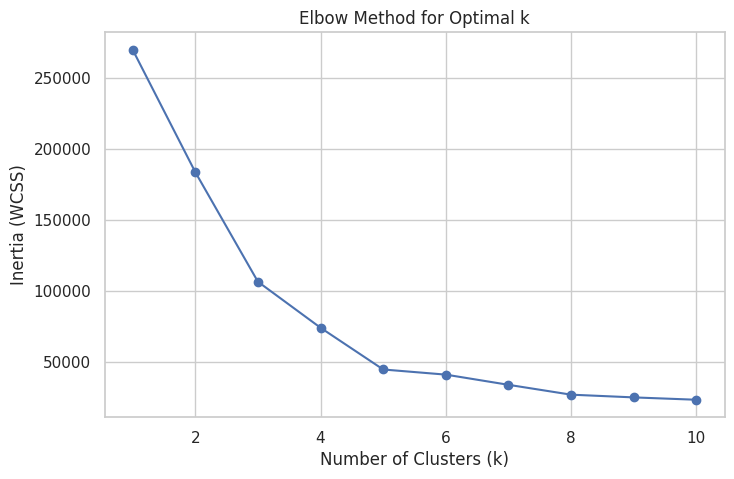


Displayed elbow method plot to determine the optimal number of clusters.

DataFrame head with Cluster column:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


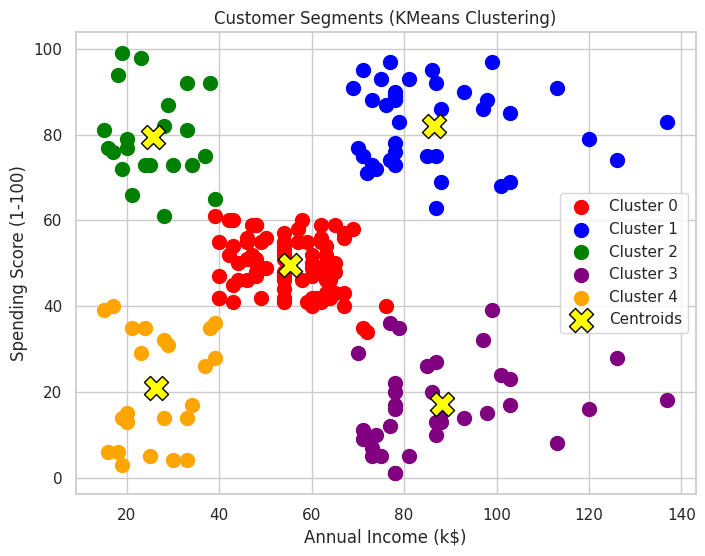

Displayed 'customer_segments.png' showing the customer segments and their centroids.

--- Cluster Interpretation ---
- *Cluster 0*: High income, high spenders (potential VIP customers)
- *Cluster 1*: Medium income, medium spending
- *Cluster 2*: Low income, high spenders (possibly young customers)
- *Cluster 3*: High income, low spending (need engagement)
- *Cluster 4*: Low income, low spending

--- Conclusion ---
- K-Means clustering helped identify 5 distinct customer segments.
- These insights can be used to tailor marketing strategies for each group.
- For example, Cluster 0 could be offered loyalty rewards, while Cluster 3 could be targeted with promotions.

Dataset Source: [Kaggle - Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

# --- Initial Data Exploration ---

# Preview the dataset
print("Head of the dataset:")
print(df.head())

# Dataset information
print("\nDataset information:")
df.info()

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for null values
print("\nNull values check:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate values check:")
print(df.duplicated().sum())

# --- Exploratory Data Analysis (EDA) ---

# Histograms for key numerical features
sns.set(style='whitegrid')
df.hist(figsize=(10, 6), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show() # Display the histograms
print("\nDisplayed histograms showing distribution of numerical features.")


# Scatter plot of Annual Income vs. Spending Score before clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis', s=100, alpha=0.8)
plt.title('Annual Income vs. Spending Score (Before Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show() # Display the scatter plot
print("Displayed Annual Income vs. Spending Score (Before Clustering) scatter plot.")


# --- Finding Optimal Clusters using Elbow Method ---

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show() # Display the elbow method plot
print("\nDisplayed elbow method plot to determine the optimal number of clusters.")


# --- Applying K-Means with Optimal Clusters ---

optimal_k = 5  # Based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X)

print("\nDataFrame head with Cluster column:")
print(df.head())

# --- Visualizing Customer Segments ---

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(optimal_k):
    plt.scatter(X[df['Cluster'] == i]['Annual Income (k$)'],
                X[df['Cluster'] == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X', edgecolor='black')

plt.title('Customer Segments (KMeans Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show() # Display the customer segments plot
print("Displayed 'customer_segments.png' showing the customer segments and their centroids.")


# --- Cluster Interpretation ---
print("\n--- Cluster Interpretation ---")
print("- *Cluster 0*: High income, high spenders (potential VIP customers)")
print("- *Cluster 1*: Medium income, medium spending")
print("- *Cluster 2*: Low income, high spenders (possibly young customers)")
print("- *Cluster 3*: High income, low spending (need engagement)")
print("- *Cluster 4*: Low income, low spending")

# --- Conclusion ---
print("\n--- Conclusion ---")
print("- K-Means clustering helped identify 5 distinct customer segments.")
print("- These insights can be used to tailor marketing strategies for each group.")
print("- For example, Cluster 0 could be offered loyalty rewards, while Cluster 3 could be targeted with promotions.")

# Dataset Source
print("\nDataset Source: [Kaggle - Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)")